In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

In [18]:
companies=pd.DataFrame()
stocks=["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "JPM", "WMT", "JNJ", "V", "PG", "KO", "NFLX", "DIS", "NVDA", "VZ", "T", "IBM", "HD","BA","MA"]
for stock in stocks:
    stk=yf.Ticker(stock)
    data=stk.history(start='2017-06-01',end='2023-07-31')
    companies[stock]=data['Close']
companies.head()

,AAPL,MSFT,GOOGL,AMZN,TSLA,JPM,WMT,JNJ,V,PG,KO,NFLX,DIS,NVDA,VZ,T,IBM,HD,BA,MA
Date,,,,,,,,,,,,,,,,,,,,
2017-06-01 00:00:00-04:00,35.680153,64.035095,49.119915,49.797501,22.691334,66.622414,23.239695,103.118629,90.287659,71.196587,35.344944,162.990005,101.924927,3.563798,30.495089,16.202539,102.094559,127.895798,176.507355,117.928368
2017-06-02 00:00:00-04:00,36.208908,65.551476,49.509079,50.336498,22.656668,66.285545,23.184368,104.159592,90.997475,71.568176,35.422131,165.179993,100.954758,3.546025,30.449184,16.202539,101.679939,128.060684,179.249390,119.648537
2017-06-05 00:00:00-04:00,35.854858,66.026505,49.894760,50.567001,23.154667,66.405853,23.370729,104.383789,91.376045,71.689377,35.499317,165.059998,100.333076,3.653905,30.403294,16.177525,101.920677,127.599045,178.043259,120.317513
2017-06-06 00:00:00-04:00,35.975971,66.245735,49.536907,50.150002,23.523333,66.542183,22.983452,104.760132,90.656746,71.737846,35.491604,165.169998,99.372330,3.637365,30.449184,16.144178,101.893929,127.112656,175.970245,119.686775
2017-06-07 00:00:00-04:00,36.190258,66.126991,49.776470,50.503502,23.976667,67.304214,23.047510,104.696060,90.940681,71.713615,35.128803,165.610001,99.767929,3.681308,30.488531,16.156685,100.964386,127.739197,177.242340,119.639000


In [19]:
train_close, test_close = train_test_split(companies, test_size=0.5, shuffle=False)

Text(0.5, 1.0, 'Assets Correlation Matrix')

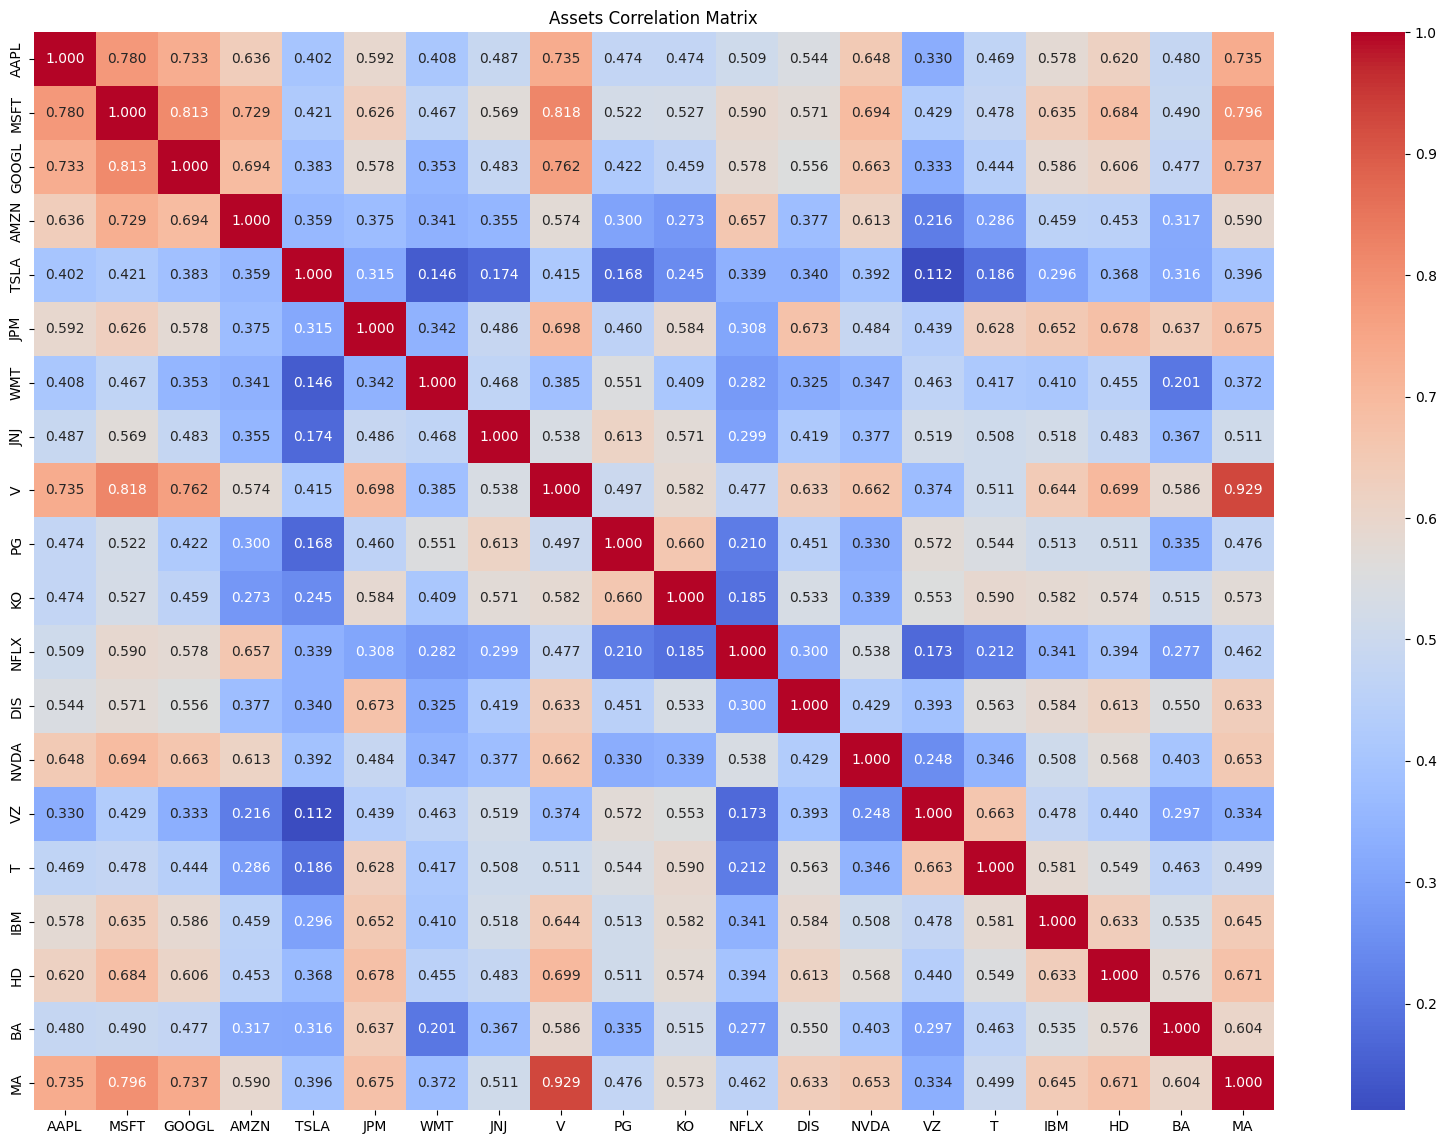

In [20]:
fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".3f")
ax.set_title('Assets Correlation Matrix')



In [21]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)

[('GOOGL', 'HD'), ('JNJ', 'V'), ('JNJ', 'PG'), ('JNJ', 'VZ'), ('JNJ', 'MA'), ('V', 'MA'), ('KO', 'DIS'), ('IBM', 'HD'), ('IBM', 'BA'), ('IBM', 'MA'), ('HD', 'MA')]


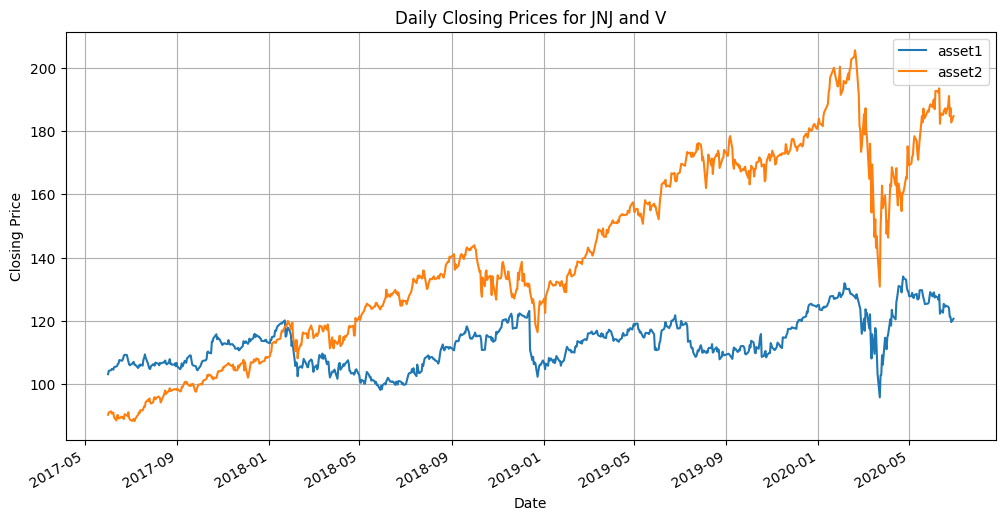

In [22]:
asset1,asset2='JNJ','V'
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]
ax = train[['asset1','asset2']].plot(figsize=(12, 6), title = 'Daily Closing Prices for {} and {}'.format(asset1,asset2))
ax.set_ylabel("Closing Price")
ax.grid(True);